# **Übungsblatt 3** 

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling


class Plots:
    """
    A class for plotting data of a pandas dataframe.
    ------------------------------------------------

    Parameters:
    -----------
    - dataframe (pd.DataFrame): the dataset to be plotted

    Methods:
    --------
    * single_boxplot(): single boxplot
    * mutli_boxplot(): multiple grouped boxplots
    * line_plot(): line plot
    * scatter_plot(): scatter plot
    * single_histogram(): single histogram of one entry
    * correlation_heatmap(): linear correlation heatmap across all entries
    * correlation_data(): correlation data set
    * group_correlation(): grouped linear correlation heatmap
    * lmplot(): linear regression plot trough a scatter plot
    * scatter_heatmap(): scatter plot with a thrid dimensional entry to create a heatmap

    """

    def __init__(self, dataframe: pd.DataFrame):
        self.dataframe = dataframe
    
    def _set_plot_style(self, **kwargs):
        """
        Set common styling elements for the plots

        Parameters:
        -----------
            **kwargs: Keyword arguments to set the style elements of the plot.
                      Supported arguments: title, title_fontsize, x_title, x_fontsize,
                      xticks_fontsize, y_title, y_fontsize, yticks_fontsize, length, height,
                      outliers (bool): Whether to show outliers in the plot.
        """
        plt.figure(figsize=(kwargs.get("length", 6), kwargs.get("height", 6)))
        plt.title(kwargs.get("title", ""))
        plt.xlabel(kwargs.get("x_title", ""))
        plt.ylabel(kwargs.get("y_title", ""))
        sns.set_theme()
        sns.set_style("darkgrid", {"axes.facecolor": ".9"})
        sns.despine(top=False, right=False, left=False, bottom=False)
        plt.tight_layout()
        
    def single_histogram(self, x_value: str, bins = "auto", **kwargs):
        """
        Create a single histogram

        Parameters:
        -----------
            * x_value (str): The column name or variable to be plotted on the x-axis
        """

        self._set_plot_style(**kwargs)
        sns.histplot(x=x_value, data=self.dataframe, bins=bins)
        plt.xlim(kwargs.get("x_bot"), kwargs.get("x_top"))
        plt.show()
        
    def line_plot(self, x_value: str, y_value: str, **kwargs):
        """
        Create a line plot using the Seaborn library

        Parameters:
        -----------
            * x_value (str): The column name or variable to be plotted on the x-axis
            * y_value (str): The column name or variable to be plotted on the y-axis
        """
        self._set_plot_style(**kwargs)
        sns.lineplot(x=x_value, y=y_value, data=self.dataframe)
        plt.ylim(kwargs.get("y_bot"), kwargs.get("y_top"))
        plt.xlim(kwargs.get("x_bot"), kwargs.get("x_top"))
        plt.show()

### Data Processing

In [2]:
data = pd.read_excel("./Ü3-HA-Daten.xlsx").tail(21)
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 1']).reset_index(drop=True)
data.columns = ["AktienKurs_X", "Zins_Z"]
data.Zins_Z = data.Zins_Z.astype(float)
data.AktienKurs_X = data.AktienKurs_X.astype(float)

### a)

In [7]:
for i in range(len(data["AktienKurs_X"])):
    try:
        result = data["AktienKurs_X"][i] * (1 + data["Zins_Z"][i+1])
        if (result == data["AktienKurs_X"][i+1]):
            print("True")
        else:
            print("False")
    except Exception as error:
        print("42")


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
42


### b)

In [8]:
mittelwert_Z = np.mean(data.Zins_Z)
print("Der Mittelwert von Z ist : ", mittelwert_Z)

Der Mittelwert von Z ist :  6.672142485296937e-05


### c)

In [9]:
empirische_streuung_Z = np.var(data.Zins_Z)
print("Empirische Streuung : ", empirische_streuung_Z)

Empirische Streuung :  3.2544152386810485e-08


### d)

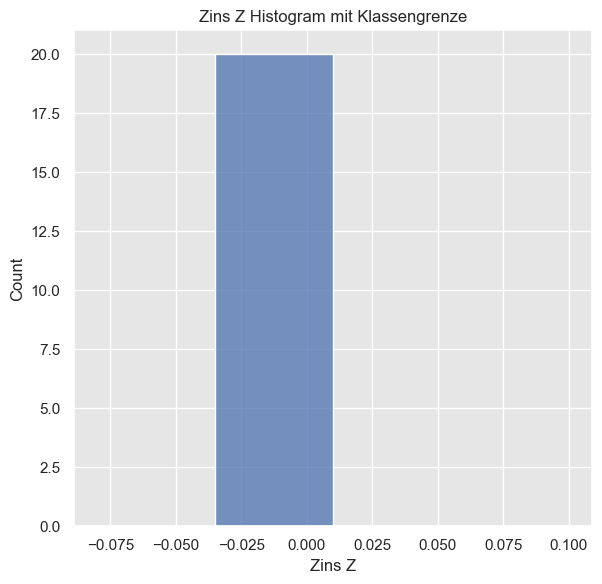

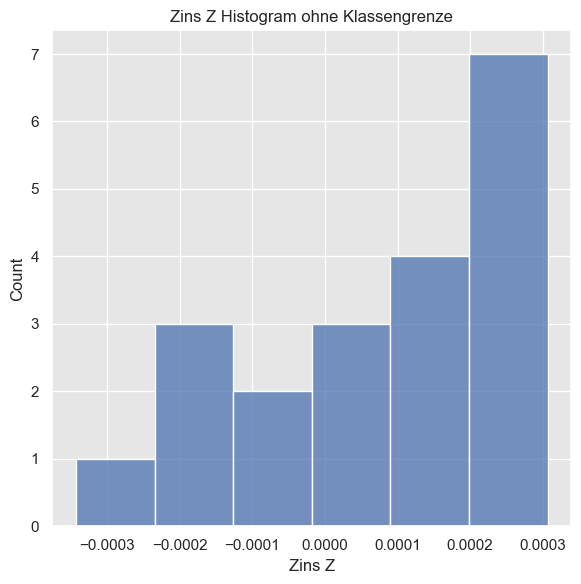

In [25]:
klassen_grenzen = [-0.080, -0.035, 0.010, 0.055, 0.100]

Plots(data).single_histogram(x_value="Zins_Z", title="Zins Z Histogram mit Klassengrenze",
                             x_title="Zins Z" , bins=klassen_grenzen)
# ohne Klassengrenze
Plots(data).single_histogram(x_value="Zins_Z", title="Zins Z Histogram ohne Klassengrenze", 
                             x_title="Zins Z" , bins="auto")

### e)

In [69]:
zinsen = list(data.Zins_Z.dropna())

In [75]:
quanitls = []
for i in range(0, len(zinsen)):
    lower = 0
    higher = 1
    zins = zinsen[i]
    for t in zinsen:
        if zins <= t:
            lower = lower + 1
        elif zins > t:
            higher = higher + 1
            
    quantil = higher/20
    quanitls.append(quantil)
    print("Tag : ", i + 1, " Zins : ", zins, "Quantil : ", higher/20)
    

Tag :  1  Zins :  0.0003067269642148765 Quantil :  1.0
Tag :  2  Zins :  0.00011346672825847323 Quantil :  0.6
Tag :  3  Zins :  0.00021311036645079654 Quantil :  0.75
Tag :  4  Zins :  0.00010661342502207652 Quantil :  0.55
Tag :  5  Zins :  0.0002463704542500927 Quantil :  0.85
Tag :  6  Zins :  -6.010030314555519e-05 Quantil :  0.3
Tag :  7  Zins :  -0.0002195105642239709 Quantil :  0.1
Tag :  8  Zins :  -0.00012979374850785082 Quantil :  0.2
Tag :  9  Zins :  2.8349314555457564e-05 Quantil :  0.4
Tag :  10  Zins :  0.00010251228387161668 Quantil :  0.5
Tag :  11  Zins :  -0.0003428600435172656 Quantil :  0.05
Tag :  12  Zins :  0.00025380203799274303 Quantil :  0.9
Tag :  13  Zins :  8.545397064323095e-05 Quantil :  0.45
Tag :  14  Zins :  0.00021364198623075246 Quantil :  0.8
Tag :  15  Zins :  -0.00018670873162329293 Quantil :  0.15
Tag :  16  Zins :  0.0002025300519343078 Quantil :  0.7
Tag :  17  Zins :  2.8206724400951653e-05 Quantil :  0.35
Tag :  18  Zins :  -9.5365737532251

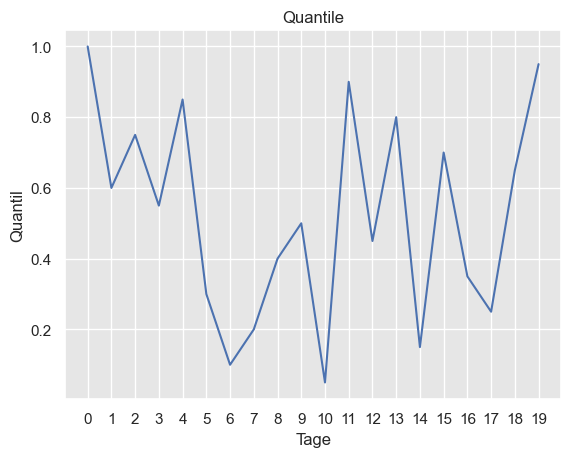

In [88]:
plt.plot(quanitls)
plt.title("Quantile")
plt.xlabel("Tage")
plt.xticks(range(20))
plt.ylabel("Quantil")
plt.show()

### f)

In [103]:
Ps = []
for zins in zinsen:
    p = ((zins * 100) - (-0.08)) / (0.10 - (-0.08))
    Ps.append(p)

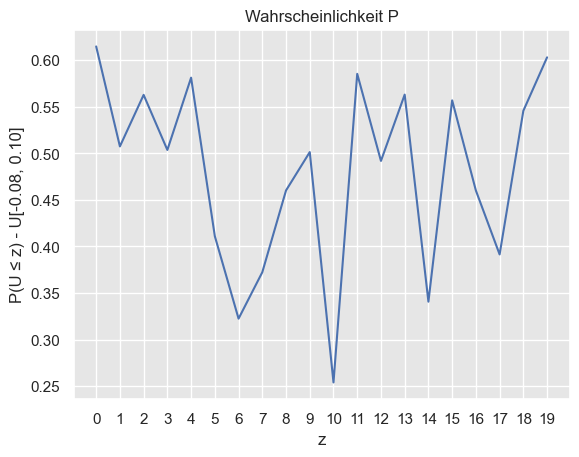

In [105]:
plt.plot(Ps)
plt.title("Wahrscheinlichkeit P")
plt.xlabel("z")
plt.xticks(range(20))
plt.ylabel("P(U ≤ z) - U[-0.08, 0.10]")
plt.show()